# Notebook 3: Regression

## Introduction

In this notebook we will look at Simple Linear Regression, Multiple Linear Regression and Polynomial Regression as part of which we will touch upon the concepts of Under/Overfitting and Regularisation. For the most part we will either use the Normal Equations in our analysis. However the normal equations become unwieldy with large amounts of data, so at the end we will touch upon numerical optimisation and Gradient Descent in particular.

On the coding side we will use Python, Numpy, Pandas and Scikit-Learn. And we will code up some of the simpler algorithms and then compare the results with those of Scikit-Learn's implementation.

There are many advanced forms of regression that we won't touch upon including those using Kernels, Gaussian Processes, Neural Nets, Decision Trees, Boostong etc. However, the idea here is to give a thorough feel for key concepts, and to introduce you to some useful tools for manipulating them.

Some of the code in this notebook originally comes from code accompanying 'Hands-On Machine Learning with Scikit-Learn & Tensorflow', by A. Geron, and some from this tutorial on Ridge Regression and the Lasso in Python:
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in their respective documentation. As usual Numpy, Pandas, and Scikit-Learn will be used heavily.

In [1]:
#Standard Python libraries for data and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Import error metric
from sklearn.metrics import mean_squared_error

#Import a dataset
from sklearn.datasets import load_boston

#Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Display charts in the notebook
%matplotlib inline

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Create training data

We will begin by creating some linear data with Gaussian noise added:

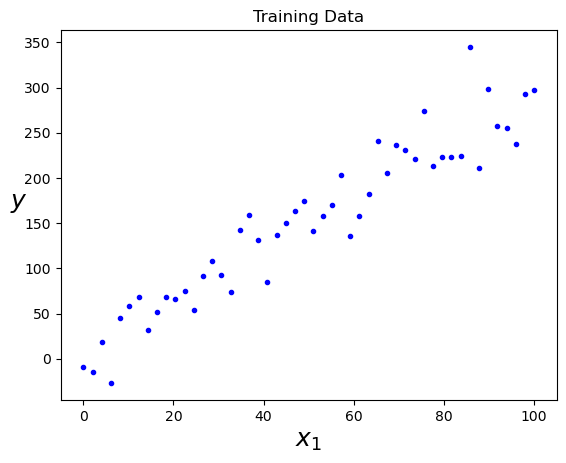

In [2]:
#We will create some one dimensional data with a bit of noise
num_points = 50
X = np.linspace(0,100,num_points).reshape(num_points,1)
y = (4 + 3 * X) + 25*np.random.randn(num_points, 1)

#Plot the data
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Training Data')
plt.show()

## Simple Linear Regression

The function below accepts training data in the form of a design matrix, $\mathbf{X}$ and target data in the form of an output vector, $\mathbf{y}$ and returns optimal parameters, $\mathbf{w}$. 
As in the lectures, $\mathbf{w}$ characterises the weight vector associated with some linear mapping, $f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x}$, which seeks to map inputs to outputs.

Notice that in this case we have 50 one-dimensional training points, so $\mathbf{X}$ will be a numpy array of shape (50,1).  
And we have one input attribute, and one bias term, so in this case $\mathbf{w}$ will be a Numpy array of shape (2,1).

### Learn $\mathbf{w}$ using the Normal Equations:

__Task:__  
Now, write a function to fit the data and return optimal weight parameters:

_Steps:_  
a) Prepend a vector of ones onto the training data (to include the bias term)  
b) Calculate `w_best` using the Normal Equations.

(Try to make the function as general as possible by allowing it to accept higher dimensional inputs in order to save further work when you do Multiple Linear Regression later).

In [ ]:
def simple_linear_regression(X, y):
    ########################################################
    # TO_DO
    #[your code here]
    

    # /TO_DO
    ########################################################

__Task:__  
Now, write a function that, given parameters `w` and input test data `X_test`, returns predictions `y_pred`.

`X_test` will be of dimension (50,1), and in the case of  Simple Linear Regression, `w` will be of dimension (2,1).

In [ ]:
def pred(w, X_test):
    ########################################################
    # TO_DO
    #[your code here]
    

    # /TO_DO
    ########################################################

__Task:__  
Use your two functions to create predictions given the input data `X`.  
Call the variable containing the predictions `ypred`.

In [ ]:
########################################################
# TO_DO
#[your code here]


# /TO_DO
########################################################

### Learn $\mathbf{w}$ using Scikit-Learn:

__Task:__  
1) Create a linear regression model using Scikit-Learn  
2) Fit the model using `X` and `y`  
3) Predict `y` given the fitted model and `X`. Put this predicition in a variable `y_lr`  
4) Calculate Mean Squared Errors for the hand coded and the Scikit-Learn models. Put the results in variables `mse` and `mse_lr`

In [ ]:
########################################################
# TO_DO
#[your code here]


# /TO_DO
########################################################

### Comparison:

If everything has been carried out correctly then when you run the code in the next cell you should see the training data (as blue dots), the line of best fit from your own code, `ypred`, and the best fit from your Scikit-Learn implementation (green '+'s).  
The red line should be a good fit to the blue training data and the green '+'s should be an exact match to the red line.  
The mean squared errors are also reported and should be very similar.

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL
# We wish to plot the variables you created: ypred, y_lr
plt.plot(X, y, 'b.')
plt.plot(X, ypred, 'r-')
plt.plot(X, y_lr, 'g+')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
print("MSE - Sci kit",mse_lr,",","MSE - Hand-Coded",mse)

## Multiple Linear Regression

We will now examine Multiple Linear Regression, and this time we will go directly through the Scikit-Learn workflow.

To avoid data cleaning/ munging etc. we will use the Boston housing data from the last tutorial.

In [ ]:
##PLEASE DO NOT CHANGE THIS CELL: Load the Boston data again
boston = load_boston()
X_boston = boston['data']
y_boston = boston['target']

### Data Processing & Model Training:

__Task:__  
1) Create a train/test split in the Boston data set.  
(_Hint:_ Use `train_test_split()`, choose `test_size=0.2`, and `random_state=42`, and call the variables containing the train(test) inputs `X_train`(`X_test`) and the train(test) targets `y_train`(`y_test`).  
2) Linear regression parameter outputs are dependent on the scale of the features. Use `StandardScalar` to fit/transform the training data and to fit the test data. (Consider why we do not also fit on the test data.)  
3) Create a linear regression model, fit it, and store predictions for `X_test` in a variable called `y_lr_boston`.  
4) How good is your trained model on the test data? Calculate the Mean Squared Error between `y_test` and `y_lr_boston`, and store the result in a variable called `mse_lr_boston`.

In [ ]:
########################################################
# TO_DO
#[your code here]

# Split

# Standardise

# Fit

# MSE

# /TO_DO
########################################################

__Task:__  
Now use your own model as before.

(If you had already coded your function to handle multiple dimensions then you have no alterations to make to the Simple Linear Regression function, otherwise you will need to generalise a little for higher dimensional data).

_Steps:_  
1) Use the Simple Linear Regression function with training inputs from your standard scalar to fit optimal weight parameters `w_boston`  
2) Make your predictions given your parameters and input test data. Store your predictions for `X_test` in a variable called `ypred_boston`  
3) Calculate the mean squared errors of your predictions. Store your answer in a variable called `mse_ypred_boston`  

In [ ]:
########################################################
# TO_DO
#[your code here]


# /TO_DO
########################################################

### Comparison:

Because we are dealing with multiple dimensions, visualisation is less simple. 

Below we show our model compared with the Scikit-Learn version: we create a scatter graph against of the `y_test` results. The pattern should be close to identical. 

We also show the Mean Squared Errors on the test set of the two models: These should be very similar.

In [ ]:
##PLEASE DO NOT CHANGE THIS CELL

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].scatter(ypred_boston,y_test)
axes[0].set_title("Linear Regression")
axes[1].scatter(y_lr_boston,y_test)
axes[1].set_title("SKLearn Linear Regression")


print("MSE-hand coded",mse_ypred_boston, "MSE-Sci-Kit",mse_lr_boston)

## Non-Linear Regression

We will now examine Non-Linear Regression.  
In particular we will consider Polynomial Regression with an underlying cubic function. Again noise is added.  
In terms of training our model will only see the noisy data. Meanwhile we will use the underlying cubic as our 'ground truth' or  test data.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

num_points = 50
X = np.linspace(-3,5,num_points).reshape(num_points,1) 
y_clean = X**3 
y = y_clean + 25*np.random.randn(num_points, 1)

__Task:__  
Scale the training data, `X`, using the `StandardScalar`. Store the result in `X`.

In [ ]:
########################################################
# TO_DO
#[your code here]


# /TO_DO
########################################################

Now we plot the scaled training data, noting that the $x_1$ axis should have been rescaled with axis extremes around -1.5/1.5

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

#Plot the data
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### Polynomial Features:

We are still performing an underlying linear regression, but this time we transform the input variables. We can use Scikit-Learn to affect theis transformation for us using `PolynomialFeatures`.

__Task:__  
1) Create polynomial features using `PolyFeatures`. Be sure to set the value of degree in the loop.  
2) `fit_transform` the values `X`  
3) Create a `LinearRegression` model and fit the transformed features on the training targets `y`.  
4) Create predictions for `X_poly` using your trained model. Store the results in a variable called `y_pred`.

In [ ]:
y_preds = []
mses_train = []
mses_test = []
degrees = range(1,30)
for degree in degrees:
    ########################################################
    # TO_DO
    #[your code here]

    # Create polynomial features
    
    # Transform X
    
    # Create a linear regression model and fit
    
    # Create predictions y_pred
    
    # /TO_DO
    ########################################################    
    
    #Please do not change code below
    y_preds.append(y_pred)
    mses_train.append(mean_squared_error(y, y_pred))
    mses_test.append(mean_squared_error(y_clean, y_pred))

### Examine Results:

This is a rather noisy graph: The training data is depicted with blue dots, and we hope to learn the ground truth, represented by the green solid line.

The various fits plotted include a range from linear regression to a 29-dimensional polynomial regression. 

If the implementation is correct you should see various lines fitting the training data points as the degree becomes higher.

__Task:__  
Consider which polynomial is the best fit and why?  
How would you decide given only training data?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

plt.plot(X, y, 'b.', label='Training Data')
plt.plot(X, y_clean, 'g', label='Ground Truth')
plt.plot(X, y_preds[0], 'c--', label='1D Poly')
plt.plot(X, y_preds[2], 'r--', label='3D Poly')
plt.plot(X, y_preds[15], 'y--',label='16D Poly')
plt.plot(X, y_preds[28], 'm--',label='29D Poly')

plt.legend()
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### Train & Test Errors:

The chart below plots the Mean Squared Error of your results.

As the degree of your polynomial increases, the training error decreases. 

On the other hand this behaviour is not manifest for the unknown test set: Below a certain complexity we have a large bias; Above a certain complexity we begin to have a model that not only fits the underlying process but also the noise. 

This is the Bias / Variance Trade-Off. In order to fit the best model to the data we must employ model selection techniques, for example cross-validation.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
plt.plot(degrees,mses_train,label="Train")
plt.plot(degrees,mses_test,label="Test")
plt.ylabel("MSE")
plt.xlabel("Polynomial Degree")
plt.legend()
plt.title("Train and Test Mean Squared Errors for polynomials")
print('On the test set the lowest MSE comes from a polynomial of degree:',np.argmin(np.array(mses_test))+1)
print('Min test MSE: ',np.min(np.array(mses_test)))

### Non-Linear Regression by Hand:

In the cell below we show the training data, `X`, the training targets, `y`, and the features we would use for Polynomial Regression. 

It is simply a Linear Regression with the input features transformed. 

We create these in order to hand-code a facsimile of the Scikit-Learn implementation which we encountered above.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
data = pd.DataFrame(np.column_stack([X,y]),columns=['X','y'])

for i in range(2,30):  
    colname = 'X_%d'%i      
    data[colname] = data['X']**i
print(data.head())

Now we present a function that performs Linear Regression and plots and calculates the residual sum of squares on a number of polynomial models.

__Task:__  
1) What is the Residual Sum of Squares?  
2) How is it different to the Mean Squared Error and why do we care about all these error functions?  
3) If we performed classification would we have a different error function for example?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
def linear_regression(data, power, models_to_plot):
    predictors=['X']
    if power>=2:
        predictors.extend(['X_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression() #normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['y'],'.')
        #plt.plot(data['X'],y_clean)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In the cell below we show the fit for a number of polynomials of varying degrees. 

__Task:__  
Which do you think show bias? And which over-fitting?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_X_%d'%i for i in range(1,30)]
ind = ['model_pow_%d'%i for i in range(1,30)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,12:234,18:235,29:236}

#Iterate through all powers and assimilate results
for i in range(1,30):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

### Coefficient Matrix:

The cell below shows the Residual Sum of Squares and coefficients for each of the regressions. For example the cubic has an intercept and three coeffients. 

__Task:__  
1) What do you notice about the Residual Sum of Squares as the degree of the polynomial increases?
2) What do you notice about the size of the coefficents as the degree of the polynomial increases?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
coef_matrix_simple

## Regularisation

In the previous cells we fitted a cubic with noise added, using various polynomials. Low degree polynomials lacked predictive power and were biased, however as the polynomial degree increased the model started overfitting to the noise. 

There are various methods of dealing with this. 

In the cell above we observed that the absolute value of the coefficients for the parameters increases as the complexity of our model increases. 

Regularisation methods place a penalty on the norm of these coefficients in our loss function.

__Task:__  
Look up and understand the difference between $\ell_2$ and $\ell_1$ regularisation.

### $\ell_2$ Regularisation / Ridge Regression:

In the cell below we use Ridge Regression using Scikit-Learn's `Ridge` model. Notice the `alpha` parameter.

In [ ]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha) #,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['y'],'.')
        #plt.plot(data['X'],y_clean)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

### Effect of `alpha` in Ridge Regression:

In the cell below we perform a regression with a 29-degree polynomial. Normally this would overfit this data.  
The charts show a Ridge Regression with varying `alpha` parameter settings.

__Task:__  
1) How would one tune `alpha` in practise to achieve good generalisation?  
2) What do you notice about the charts as `alpha` changes?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2,30)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-20, 1e-15, 1e-8, 1e-4, 1e-3,1e-2, 0.1, 5, 20, 1000]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_X_%d'%i for i in range(1,30)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-20:231, 1e-8:232, 1e-3:233, 0.1:234, 5:235, 1000:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

### $\ell_2$ Regularised Coefficient Matrix:

For the 29th degree polynomial we display the coefficients and Residual Sum of Squares for various `alpha` settings.  
For comparison the unregularised version would be similar to the top line of the table.

__Task:__  
1) What do you notice about the Residual Sum of Squares as `alpha` increases?  
2) Do any of the coefficients go to zero?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

### $\ell_1$ Regularisation / the LASSO:

In the cells below we perform the same regressions but this time using $\ell_1$ regularisation.

__Task:__  
1) What do you notice about the charts?  
2) Is there a difference to Ridge Regression?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=int(1e5))
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['y'],'.')
        #plt.plot(data['X'],y_clean)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2,30)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-3, 1e-2, 0.1,2, 1,2,3, 4, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,30)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-15:231, 1e-3:232,1e-2:233, 0.1:234, 1:235, 10:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)


### $\ell_1$ Regularised Coefficient Matrix:

Again we display the Residual Sum of Squares and coefficients for the 29th degree polynomial for varying `alpha` settings.

__Tasks:__  
1) In a least squares sense which will have a lower error on the training data: unregularised or $\ell_2$ regularised regression?  
2) In a least squares sense which will have a lower error on the training data: $\ell_2$ or $\ell_1$ regularised regression?  
3) What do you notice about the coefficients for $\ell_1$ regularisation as `alpha` increases?  
4) Is there any particular behaviour that stands out as `alpha` increases which was not manifest in the $\ell_2$ case?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
coef_matrix_lasso

## Linear Regression Using Gradient Descent

Recall the Normal Equations:
\begin{align}
\mathbf{w} = (\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}\mathbf{y}
\end{align}

These equations become unwieldy as data scales.

__Task:__  
Why is this?

Numerical optimisation techniques may be used as an alternative. One such technique is Gradient Descent.   
In the example below we wish to fit the data using Batch Gradient Descent. (To keep things straightforward we shall go back to our original linear data plus noise example). 

__Task:__  
Research the differences between Batch, Mini-Batch and Stochastic Gradient Descent.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
num_points = 50
X = np.linspace(0,100,num_points).reshape(num_points,1)
y = (4 + 3 * X) + 25*np.random.randn(num_points, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Plot the data, we want to divine a best fit
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Training Data')
plt.show()

### Implement Batch Gradient Descent:

__Task:__  
1) Derive the gradient of the error with respect to the weight parameters in linear regression.
2) Implement gradient linear regression in code.

_Hints:_  
a) First add a bias as you did previously.  
b) Create a loop ranging to the number of iterations we wish to perform (`n_iterations`).  
c) Calculate the gradients within the loop . 
d) Update the variable `w_best` by taking a step-size `eta` in the opposite direction to the gradient.

In [ ]:
def gradient_linear_regression(X, y, n_iterations):
    eta = 0.01
    n_iterations = n_iterations 
    m = X.shape[0]
    w_best = np.random.randn(X.shape[1]+1,1)
    
    ########################################################
    # TO_DO
    #[your code here]
    

    # /TO_DO
    ########################################################

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
theta_best_10 = gradient_linear_regression(X, y,10)
theta_best_30 = gradient_linear_regression(X, y,30)
theta_best_50 = gradient_linear_regression(X, y,30)
theta_best_100 = gradient_linear_regression(X, y,100)
theta_best_500 = gradient_linear_regression(X, y,500)

ypred_10 = pred(theta_best_10,X)
ypred_30 = pred(theta_best_30,X)
ypred_50 = pred(theta_best_50,X)
ypred_100 = pred(theta_best_100,X)
ypred_500 = pred(theta_best_500,X)

### Batch Gradient Descent Results:

The training data is fitted by Linear Regression with Gradient Descent, however we have used a different number of epochs. (Epochs are the number of iterations we perform before we stop learning).

__Task:__  
1) What do you notice as the epochs increase?  
2) How would you decide the number of epochs to perform?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
plt.plot(X, y, 'b.', label='Training Data')
plt.plot(X, ypred_10, label='Prediction 10 epochs')
plt.plot(X, ypred_30, label='Prediction 30 epochs')
plt.plot(X, ypred_50, label='Prediction 50 epochs')
plt.plot(X, ypred_100,label='Prediction 100 epochs')
plt.plot(X, ypred_500, label='Prediction 500 epochs')


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()